In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import plot_model
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Display shapes
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (40000, 32, 32, 3)
Shape of y_train: (40000, 1)


In [6]:
# Get unique values in y_train using numpy
unique_labels = np.unique(y_train)
print("Unique labels:", unique_labels)

Unique labels: [0 1 2 3 4 5 6 7 8 9]


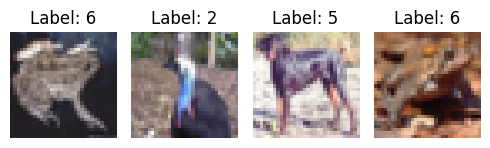

In [7]:
# Plotting 4 images in a row
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train[i][0]}")  # Show the label
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

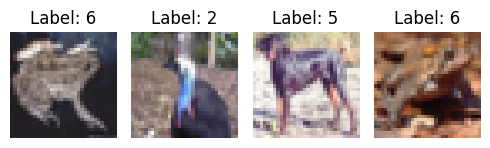

In [9]:
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train[i][0]}")  # Show the label
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [10]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(),
    
    Flatten(),

    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 256)        0

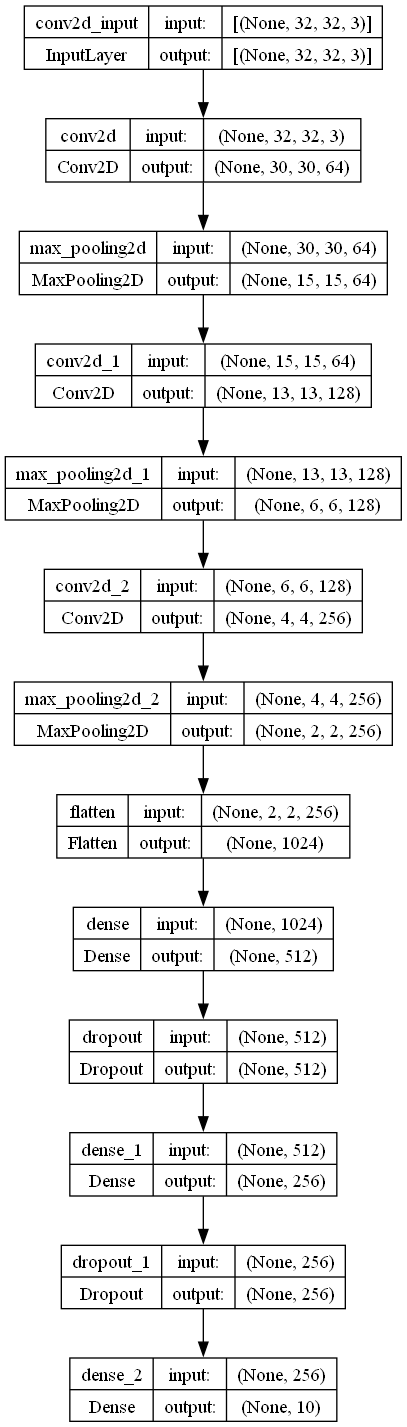

In [12]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [13]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 13s 8ms/step - loss: 2.3722 - accuracy: 0.2933 - val_loss: 1.9353 - val_accuracy: 0.4088
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8221 - accuracy: 0.4476 - val_loss: 1.6432 - val_accuracy: 0.5052
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6176 - accuracy: 0.5110 - val_loss: 1.4810 - val_accuracy: 0.5585
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4793 - accuracy: 0.5569 - val_loss: 1.3817 - val_accuracy: 0.5931
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3737 - accuracy: 0.5886 - val_loss: 1.2938 - val_accuracy: 0.6067
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2844 - accuracy: 0.6152 - val_loss: 1.2211 - val_accuracy: 0.6317
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2118 - accuracy: 0.6363 - val_loss: 1.1666 - val_accuracy

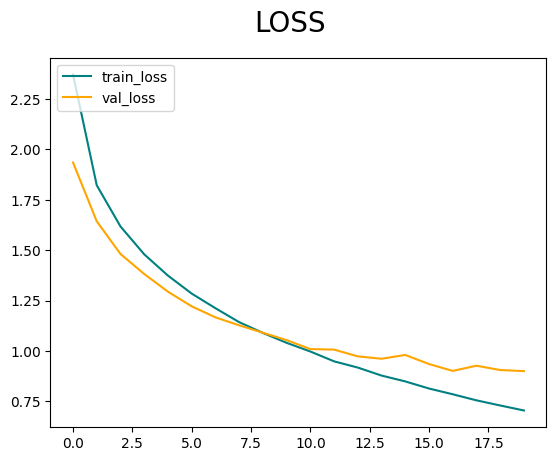

In [15]:
fig = plt.figure()
plt.plot(history.history["loss"], color='teal', label='train_loss')
plt.plot(history.history["val_loss"], color='orange', label='val_loss')
plt.suptitle('LOSS',fontsize=20)
plt.legend(loc="upper left")
plt.show()

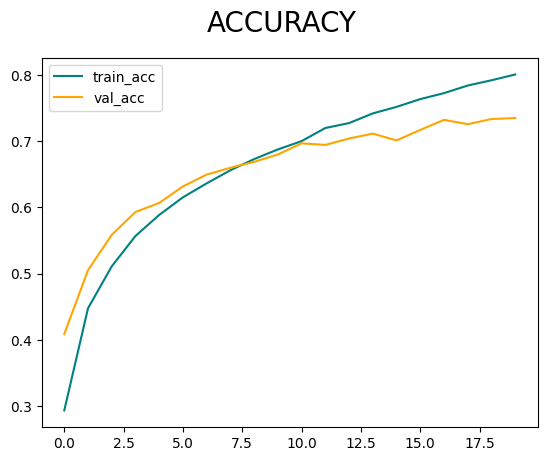

In [16]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='train_acc')
plt.plot(history.history['val_accuracy'],color='orange', label='val_acc')
plt.suptitle('ACCURACY',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.9063 - accuracy: 0.7337
Test Accuracy: 73.37%
Test Loss: 0.9063293933868408


313/313 [==============================] - 1s 2ms/step


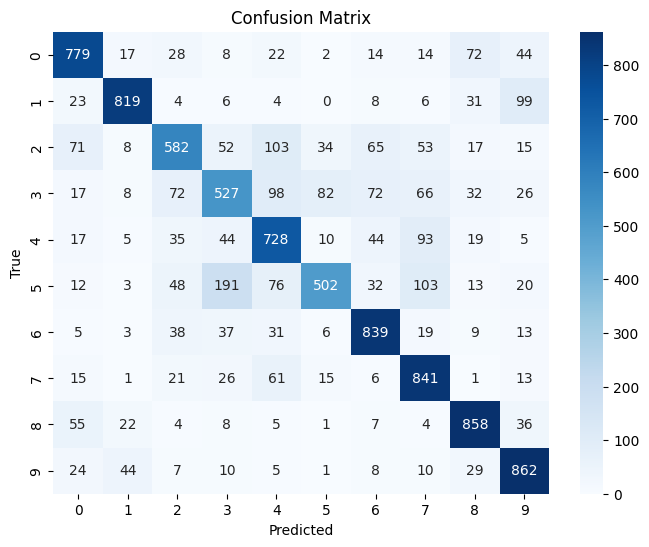

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have predictions for x_test stored in y_pred
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Define class labels (if available)
class_labels = unique_labels

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 18ms/step


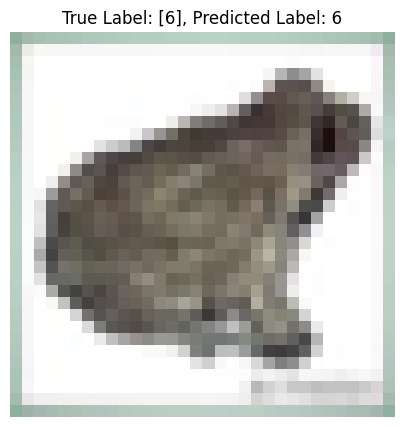

In [74]:
# Select a single image from the test set (e.g., the first image)
import random
image_index = random.randint(1, 499)  # Change this index to select a different image
selected_image = x_test[image_index]
true_label = y_test[image_index]


# Make a prediction on the selected image
prediction = model.predict(np.expand_dims(selected_image, axis=0))
predicted_label = np.argmax(prediction)

# Display the selected image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(selected_image)
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()